# 0. Instalacion de utilitarios Pyspark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.3.4/spark-2.3.4-bin-hadoop2.7.tgz
!tar xf spark-2.3.4-bin-hadoop2.7.tgz

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz


In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"


In [0]:
!pip install pyspark

In [0]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local").getOrCreate()
sc = SparkContext.getOrCreate()

# 1. Lectura del origen datos

In [0]:
# Lectura desde un archivo fisico
from google.colab import files
uploaded = files.upload()

In [0]:
# Conexion al drive
#---------------------------
from google.colab import drive
drive.mount('/content/drive')

In [0]:
ls

#2.  Cargando los datos en formato Spark

In [10]:
DS_Renovacion_prest = spark.read.csv('/content/drive/My Drive/PySpark Machine Learning en plataforma Big Data/Training R ML en Casos de Negocios/4_Caso negocio renovacion Prestamo/0.DS_Renovacion_prestamo.csv', sep=';', header=True, inferSchema=True)

# 2.1 Revision de formatos 
DS_Renovacion_prest.printSchema()

root
 |-- MES: integer (nullable = true)
 |-- CLIENTE: integer (nullable = true)
 |-- LINEA_RENOVADO: integer (nullable = true)
 |-- PLAZO_RENOVADO: integer (nullable = true)
 |-- FLAG_VENTA: integer (nullable = true)
 |-- USO_LINEA_TOTAL_TC_T2: double (nullable = true)
 |-- USO_TRIM_LINEA_BBVA: double (nullable = true)
 |-- NR_ENTIDADES_TOTAL_T2: integer (nullable = true)
 |-- DIFF_NRO_ENTIDA_TOTALES_T2_T12: integer (nullable = true)
 |-- SDO_CONSUMO_T2: double (nullable = true)
 |-- RESENCIA_OFERTA_PLD_RENOVADO: integer (nullable = true)
 |-- Ahorro_Sldo_Bco_T1: integer (nullable = true)
 |-- PConsumo_Sldo_Bco_T1: integer (nullable = true)
 |-- SDO_BCO_tot_sm_pasivo_Bco_6M: double (nullable = true)
 |-- EDAD: integer (nullable = true)
 |-- SEXO: string (nullable = true)
 |-- EST_CIVIL: string (nullable = true)
 |-- ANTIGUEDAD_MES: integer (nullable = true)
 |-- REGION: string (nullable = true)
 |-- FLAG_LIMA_PROVINCIA: integer (nullable = true)
 |-- SUELDO_ESTIMADO: double (nullable 

In [11]:
# 2.2 Revvisiones  
DS_Renovacion_prest.show(5)

+------+-------+--------------+--------------+----------+---------------------+-------------------+---------------------+------------------------------+--------------+----------------------------+------------------+--------------------+----------------------------+----+----+---------+--------------+------------+-------------------+---------------+----------------------------------+
|   MES|CLIENTE|LINEA_RENOVADO|PLAZO_RENOVADO|FLAG_VENTA|USO_LINEA_TOTAL_TC_T2|USO_TRIM_LINEA_BBVA|NR_ENTIDADES_TOTAL_T2|DIFF_NRO_ENTIDA_TOTALES_T2_T12|SDO_CONSUMO_T2|RESENCIA_OFERTA_PLD_RENOVADO|Ahorro_Sldo_Bco_T1|PConsumo_Sldo_Bco_T1|SDO_BCO_tot_sm_pasivo_Bco_6M|EDAD|SEXO|EST_CIVIL|ANTIGUEDAD_MES|      REGION|FLAG_LIMA_PROVINCIA|SUELDO_ESTIMADO|CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD|
+------+-------+--------------+--------------+----------+---------------------+-------------------+---------------------+------------------------------+--------------+----------------------------+------------------+---------------

In [12]:
# 2.3 Validacion de carga del total de registros
print(DS_Renovacion_prest.count())

87556


In [13]:
# 2.4 Exploracion inicial
DS_Renovacion_prest.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+---------------------+-------------------+---------------------+------------------------------+------------------+----------------------------+------------------+--------------------+----------------------------+------------------+-----+---------+------------------+------+-------------------+------------------+----------------------------------+
|summary|               MES|           CLIENTE|    LINEA_RENOVADO|    PLAZO_RENOVADO|         FLAG_VENTA|USO_LINEA_TOTAL_TC_T2|USO_TRIM_LINEA_BBVA|NR_ENTIDADES_TOTAL_T2|DIFF_NRO_ENTIDA_TOTALES_T2_T12|    SDO_CONSUMO_T2|RESENCIA_OFERTA_PLD_RENOVADO|Ahorro_Sldo_Bco_T1|PConsumo_Sldo_Bco_T1|SDO_BCO_tot_sm_pasivo_Bco_6M|              EDAD| SEXO|EST_CIVIL|    ANTIGUEDAD_MES|REGION|FLAG_LIMA_PROVINCIA|   SUELDO_ESTIMADO|CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD|
+-------+------------------+------------------+------------------+------------------+---------

# 3. Limpieza e imputacion de variables con valores vacios


In [16]:
# Proceso para identificar valores nulos en cada variables
from pyspark.sql.functions import col,sum

DS_Renovacion_prest.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in DS_Renovacion_prest.columns)).show()

DS_Renovacion_prest.select(*(sum(col(c).isNull().cast("int")/87556).alias(c) for c in DS_Renovacion_prest.columns)).show()

+---+-------+--------------+--------------+----------+---------------------+-------------------+---------------------+------------------------------+--------------+----------------------------+------------------+--------------------+----------------------------+----+----+---------+--------------+------+-------------------+---------------+----------------------------------+
|MES|CLIENTE|LINEA_RENOVADO|PLAZO_RENOVADO|FLAG_VENTA|USO_LINEA_TOTAL_TC_T2|USO_TRIM_LINEA_BBVA|NR_ENTIDADES_TOTAL_T2|DIFF_NRO_ENTIDA_TOTALES_T2_T12|SDO_CONSUMO_T2|RESENCIA_OFERTA_PLD_RENOVADO|Ahorro_Sldo_Bco_T1|PConsumo_Sldo_Bco_T1|SDO_BCO_tot_sm_pasivo_Bco_6M|EDAD|SEXO|EST_CIVIL|ANTIGUEDAD_MES|REGION|FLAG_LIMA_PROVINCIA|SUELDO_ESTIMADO|CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD|
+---+-------+--------------+--------------+----------+---------------------+-------------------+---------------------+------------------------------+--------------+----------------------------+------------------+--------------------+---------------

In [0]:
# Se identifico que hay 4 columnas con más de 5% de valores nulos
# USO_LINEA_TOTAL_TC_T2       67% nulos imputamos valores
# USO_TRIM_LINEA_BBVA         67% nulos imputamos valores
# SDO_CONSUMO_T2              18% nulos imputamos valores
# RESENCIA_OFERTA_PLD_RENOVADO 49% nulos imputamos valores

DS_Renovacion_prest.printSchema()



In [15]:
# Habilitamos las funciones de Pyspark, es importante!
from pyspark.sql.functions import *

DS_Renovacion_prest=DS_Renovacion_prest.withColumn('USO_LINEA_TOTAL_TC_T2', when(DS_Renovacion_prest.USO_LINEA_TOTAL_TC_T2.isNull(), 0).otherwise(DS_Renovacion_prest.USO_LINEA_TOTAL_TC_T2))
DS_Renovacion_prest=DS_Renovacion_prest.withColumn('USO_TRIM_LINEA_BBVA', when(DS_Renovacion_prest.USO_TRIM_LINEA_BBVA.isNull(), 0).otherwise(DS_Renovacion_prest.USO_TRIM_LINEA_BBVA))
DS_Renovacion_prest=DS_Renovacion_prest.withColumn('SDO_CONSUMO_T2', when(DS_Renovacion_prest.SDO_CONSUMO_T2.isNull(), 0).otherwise(DS_Renovacion_prest.SDO_CONSUMO_T2))
DS_Renovacion_prest=DS_Renovacion_prest.withColumn('RESENCIA_OFERTA_PLD_RENOVADO', when(DS_Renovacion_prest.RESENCIA_OFERTA_PLD_RENOVADO.isNull(), 0).otherwise(DS_Renovacion_prest.RESENCIA_OFERTA_PLD_RENOVADO))

#verificamos el reemplazamiento
DS_Renovacion_prest.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+---------------------+-------------------+---------------------+------------------------------+------------------+----------------------------+------------------+--------------------+----------------------------+------------------+-----+---------+------------------+------+-------------------+------------------+----------------------------------+
|summary|               MES|           CLIENTE|    LINEA_RENOVADO|    PLAZO_RENOVADO|         FLAG_VENTA|USO_LINEA_TOTAL_TC_T2|USO_TRIM_LINEA_BBVA|NR_ENTIDADES_TOTAL_T2|DIFF_NRO_ENTIDA_TOTALES_T2_T12|    SDO_CONSUMO_T2|RESENCIA_OFERTA_PLD_RENOVADO|Ahorro_Sldo_Bco_T1|PConsumo_Sldo_Bco_T1|SDO_BCO_tot_sm_pasivo_Bco_6M|              EDAD| SEXO|EST_CIVIL|    ANTIGUEDAD_MES|REGION|FLAG_LIMA_PROVINCIA|   SUELDO_ESTIMADO|CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD|
+-------+------------------+------------------+------------------+------------------+---------

In [17]:
# Limpiando de todos los valores nulos el data set

DS_Renovacion_prest=DS_Renovacion_prest.na.drop()

print(DS_Renovacion_prest.count())

87501


# 4. Exploracion de datos

In [18]:
#4.1  Estructura de los datos
print(DS_Renovacion_prest.count(),len(DS_Renovacion_prest.columns))

DS_Renovacion_prest.printSchema()

DS_Renovacion_prest.show(5)

87501 22
root
 |-- MES: integer (nullable = true)
 |-- CLIENTE: integer (nullable = true)
 |-- LINEA_RENOVADO: integer (nullable = true)
 |-- PLAZO_RENOVADO: integer (nullable = true)
 |-- FLAG_VENTA: integer (nullable = true)
 |-- USO_LINEA_TOTAL_TC_T2: double (nullable = true)
 |-- USO_TRIM_LINEA_BBVA: double (nullable = true)
 |-- NR_ENTIDADES_TOTAL_T2: integer (nullable = true)
 |-- DIFF_NRO_ENTIDA_TOTALES_T2_T12: integer (nullable = true)
 |-- SDO_CONSUMO_T2: double (nullable = true)
 |-- RESENCIA_OFERTA_PLD_RENOVADO: integer (nullable = true)
 |-- Ahorro_Sldo_Bco_T1: integer (nullable = true)
 |-- PConsumo_Sldo_Bco_T1: integer (nullable = true)
 |-- SDO_BCO_tot_sm_pasivo_Bco_6M: double (nullable = true)
 |-- EDAD: integer (nullable = true)
 |-- SEXO: string (nullable = true)
 |-- EST_CIVIL: string (nullable = true)
 |-- ANTIGUEDAD_MES: integer (nullable = true)
 |-- REGION: string (nullable = true)
 |-- FLAG_LIMA_PROVINCIA: integer (nullable = true)
 |-- SUELDO_ESTIMADO: double (

In [19]:
#4.2 Variable objetivo

print(DS_Renovacion_prest.count())
DS_Renovacion_prest.groupBy('FLAG_VENTA').count().show()

# Efectividad de venta
3487/87501 

87501
+----------+-----+
|FLAG_VENTA|count|
+----------+-----+
|         1| 3487|
|         0|84014|
+----------+-----+



0.039850973131735634

In [20]:
#4.3 Revision de variables numericas 

DS_Renovacion_prest.describe().show()

+-------+------------------+-----------------+-----------------+------------------+--------------------+---------------------+-------------------+---------------------+------------------------------+------------------+----------------------------+------------------+--------------------+----------------------------+------------------+-----+---------+------------------+------+-------------------+------------------+----------------------------------+
|summary|               MES|          CLIENTE|   LINEA_RENOVADO|    PLAZO_RENOVADO|          FLAG_VENTA|USO_LINEA_TOTAL_TC_T2|USO_TRIM_LINEA_BBVA|NR_ENTIDADES_TOTAL_T2|DIFF_NRO_ENTIDA_TOTALES_T2_T12|    SDO_CONSUMO_T2|RESENCIA_OFERTA_PLD_RENOVADO|Ahorro_Sldo_Bco_T1|PConsumo_Sldo_Bco_T1|SDO_BCO_tot_sm_pasivo_Bco_6M|              EDAD| SEXO|EST_CIVIL|    ANTIGUEDAD_MES|REGION|FLAG_LIMA_PROVINCIA|   SUELDO_ESTIMADO|CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD|
+-------+------------------+-----------------+-----------------+------------------+-------------

In [21]:
#4.4 Revision de variable categoria

DS_Renovacion_prest.groupBy('SEXO','FLAG_VENTA').count().sort('SEXO').show()

+----+----------+-----+
|SEXO|FLAG_VENTA|count|
+----+----------+-----+
|   F|         1|  935|
|   F|         0|25184|
|   M|         1| 2552|
|   M|         0|58830|
+----+----------+-----+



# 5. Relevancia y transformacion de variables 

In [22]:
# Convertiremos variables de tipo categoria a numericas creando un solo vector del total de variables


# Lista de variables categoricas:  REGION, SEXO, EST_CIVIL,FLAG_LIMA_PROVINCIA


# StringIndexer> Crea columnas por valor distintio de una variable categorica


# Metodo de transformacion: Generando valores por cada categoria
#----------------------------------------------------
from pyspark.ml.feature import StringIndexer 
from pyspark.ml.feature import VectorAssembler  

# Transformacion
region_indexer =StringIndexer(inputCol="REGION", outputCol="REGION_Numerico").fit(DS_Renovacion_prest)

DS_Renovacion_prest = region_indexer.transform(DS_Renovacion_prest)

DS_Renovacion_prest.show(5,False)


+------+-------+--------------+--------------+----------+---------------------+-------------------+---------------------+------------------------------+--------------+----------------------------+------------------+--------------------+----------------------------+----+----+---------+--------------+------------+-------------------+---------------+----------------------------------+---------------+
|MES   |CLIENTE|LINEA_RENOVADO|PLAZO_RENOVADO|FLAG_VENTA|USO_LINEA_TOTAL_TC_T2|USO_TRIM_LINEA_BBVA|NR_ENTIDADES_TOTAL_T2|DIFF_NRO_ENTIDA_TOTALES_T2_T12|SDO_CONSUMO_T2|RESENCIA_OFERTA_PLD_RENOVADO|Ahorro_Sldo_Bco_T1|PConsumo_Sldo_Bco_T1|SDO_BCO_tot_sm_pasivo_Bco_6M|EDAD|SEXO|EST_CIVIL|ANTIGUEDAD_MES|REGION      |FLAG_LIMA_PROVINCIA|SUELDO_ESTIMADO|CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD|REGION_Numerico|
+------+-------+--------------+--------------+----------+---------------------+-------------------+---------------------+------------------------------+--------------+----------------------------+--

In [23]:
# Revision
DS_Renovacion_prest.groupBy('REGION','REGION_Numerico').count().show()

+--------------+---------------+-----+
|        REGION|REGION_Numerico|count|
+--------------+---------------+-----+
|LIMA PROVINCIA|           11.0| 3029|
|         OESTE|           12.0| 2786|
|    LIMA NORTE|            3.0| 8970|
|       ORIENTE|            8.0| 4238|
|      LIMA SUR|            6.0| 6269|
|   LIMA CENTRO|            7.0| 5441|
|  LIMA MODERNA|            0.0|13830|
|        CENTRO|            1.0| 9984|
|     LIMA ESTE|            5.0| 8262|
|SIERRA CENTRAL|           10.0| 3059|
|           SUR|            4.0| 8345|
|         NORTE|            2.0| 9291|
|LIMA BALNEARIO|           13.0|  150|
|        CALLAO|            9.0| 3847|
+--------------+---------------+-----+



In [0]:
# Transformacion en 1 vector la variable categorica (One-hot encoder)

from pyspark.ml.feature import OneHotEncoder

region_encoder=OneHotEncoder(inputCol="REGION_Numerico", outputCol="REGION_Vector")

DS_Renovacion_prest = region_encoder.transform(DS_Renovacion_prest)  

In [25]:
# Revision
DS_Renovacion_prest.groupBy('REGION','REGION_Numerico','REGION_Vector').count().show()

+--------------+---------------+---------------+-----+
|        REGION|REGION_Numerico|  REGION_Vector|count|
+--------------+---------------+---------------+-----+
|SIERRA CENTRAL|           10.0|(13,[10],[1.0])| 3059|
|         NORTE|            2.0| (13,[2],[1.0])| 9291|
|  LIMA MODERNA|            0.0| (13,[0],[1.0])|13830|
|     LIMA ESTE|            5.0| (13,[5],[1.0])| 8262|
|        CENTRO|            1.0| (13,[1],[1.0])| 9984|
|        CALLAO|            9.0| (13,[9],[1.0])| 3847|
|LIMA PROVINCIA|           11.0|(13,[11],[1.0])| 3029|
|      LIMA SUR|            6.0| (13,[6],[1.0])| 6269|
|   LIMA CENTRO|            7.0| (13,[7],[1.0])| 5441|
|       ORIENTE|            8.0| (13,[8],[1.0])| 4238|
|         OESTE|           12.0|(13,[12],[1.0])| 2786|
|           SUR|            4.0| (13,[4],[1.0])| 8345|
|LIMA BALNEARIO|           13.0|     (13,[],[])|  150|
|    LIMA NORTE|            3.0| (13,[3],[1.0])| 8970|
+--------------+---------------+---------------+-----+



In [26]:
#Revisemos lo conseguido
DS_Renovacion_prest.select('FLAG_VENTA','LINEA_RENOVADO','SUELDO_ESTIMADO','REGION_Vector').show(3,False)

+----------+--------------+---------------+--------------+
|FLAG_VENTA|LINEA_RENOVADO|SUELDO_ESTIMADO|REGION_Vector |
+----------+--------------+---------------+--------------+
|0         |3770          |3531.0         |(13,[3],[1.0])|
|0         |1300          |1322.0         |(13,[5],[1.0])|
|0         |7800          |4234.0         |(13,[0],[1.0])|
+----------+--------------+---------------+--------------+
only showing top 3 rows



In [0]:
# REdefiniendo feature
# Se elimina en caso ya exista una nueva columna
DS_Renovacion_prest=DS_Renovacion_prest.drop("features")

In [0]:
# ESCENARIO 1 -- NO USADO
# Consolidacion de variables
df_assembler = VectorAssembler(inputCols=['LINEA_RENOVADO','SUELDO_ESTIMADO','USO_TRIM_LINEA_BBVA','REGION_Vector'], outputCol="features")

DS_Renovacion_prest = df_assembler.transform(DS_Renovacion_prest)

In [0]:
# ESCENARIO 2 -- NO USADO
# Consolidacion de variables
df_assembler = VectorAssembler(inputCols=['LINEA_RENOVADO','ANTIGUEDAD_MES','SUELDO_ESTIMADO','USO_TRIM_LINEA_BBVA','REGION_Vector'], outputCol="features")

DS_Renovacion_prest = df_assembler.transform(DS_Renovacion_prest)

In [0]:
# ESCENARIO 3 -- EN EJECUCION
# Consolidacion de variables
df_assembler = VectorAssembler(inputCols=['LINEA_RENOVADO','SDO_CONSUMO_T2','ANTIGUEDAD_MES','SUELDO_ESTIMADO','Ahorro_Sldo_Bco_T1','USO_TRIM_LINEA_BBVA','REGION_Vector'], outputCol="features")

DS_Renovacion_prest = df_assembler.transform(DS_Renovacion_prest)

In [0]:
# ESCENARIO 4 -- EN EJECUCION
# Consolidacion de variables
df_assembler = VectorAssembler(inputCols=['LINEA_RENOVADO','ANTIGUEDAD_MES','SUELDO_ESTIMADO','SDO_CONSUMO_T2','USO_TRIM_LINEA_BBVA','REGION_Vector'], outputCol="features")

DS_Renovacion_prest = df_assembler.transform(DS_Renovacion_prest)

In [0]:
# ESCENARIO 5 -- EN EJECUCION
# Consolidacion de variables
df_assembler = VectorAssembler(inputCols=['USO_TRIM_LINEA_BBVA','LINEA_RENOVADO','USO_LINEA_TOTAL_TC_T2','Ahorro_Sldo_Bco_T1','PConsumo_Sldo_Bco_T1','SUELDO_ESTIMADO','SDO_BCO_tot_sm_pasivo_Bco_6M','CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD','SDO_CONSUMO_T2','ANTIGUEDAD_MES','RESENCIA_OFERTA_PLD_RENOVADO'], outputCol="features")

DS_Renovacion_prest = df_assembler.transform(DS_Renovacion_prest)

In [112]:
#Revision

#DS_Renovacion_prest.printSchema()
DS_Renovacion_prest.select('FLAG_VENTA','features').show(3,False)

+----------+----------------------------------------------------------------------------------+
|FLAG_VENTA|features                                                                          |
+----------+----------------------------------------------------------------------------------+
|0         |[0.0,3770.0,0.0,1850.0,457.0,3531.0,3754.333333,0.071915,271.12,23.0,21.0]        |
|0         |[0.0,1300.0,0.0,2093.0,11200.0,1322.0,1581.333333,8.61538,11200.0,56.0,9.0]       |
|0         |[0.225615,7800.0,0.429507,16208.0,4778.0,4234.0,10241.0,2.58416,20156.45,20.0,0.0]|
+----------+----------------------------------------------------------------------------------+
only showing top 3 rows



In [0]:
#Matriz de Modelamiento
model_df_Renovacion_prest=DS_Renovacion_prest.select('FLAG_VENTA','features')

# 6. Entrenamiento del Algoritmo (Regresion Logistica)

In [126]:
# Definicion de muestra de entrenamiento y Validacion

training_df,test_df=model_df_Renovacion_prest.randomSplit([0.5,0.5],seed=1234) 

# Tamaño de muestra
print(training_df.count(),test_df.count())


43710 43791


In [127]:
training_df.describe().show()

+-------+--------------------+
|summary|          FLAG_VENTA|
+-------+--------------------+
|  count|               43710|
|   mean|0.039670555936856554|
| stddev| 0.19518625599513598|
|    min|                   0|
|    max|                   1|
+-------+--------------------+



In [116]:
training_df.describe().show()

+-------+-------------------+
|summary|         FLAG_VENTA|
+-------+-------------------+
|  count|              61323|
|   mean|0.03925117818762944|
| stddev|0.19419355848645703|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



In [0]:
# Modelamiento de Regresion Logistica

from pyspark.ml.classification import LogisticRegression

log_reg=LogisticRegression(maxIter=10,labelCol='FLAG_VENTA').fit(training_df)

In [129]:
# Revision
log_reg.coefficients

DenseVector([0.6205, 0.0, 0.6152, 0.0, 0.0, -0.0001, -0.0, -0.0573, 0.0, -0.0013, -0.0375])

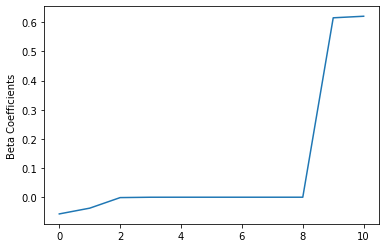

In [130]:
# Representacion grafica de los betas de la REgresion Logistica
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(log_reg.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

In [131]:
# Aplicando sobre la data Train el modelo identificado

train_results=log_reg.evaluate(training_df).predictions


# Verificando las probabilidad en los clientes con compra

train_results.filter(train_results['FLAG_VENTA']==1).select(['FLAG_VENTA','prediction','probability']).show(10,False)

+----------+----------+-----------------------------------------+
|FLAG_VENTA|prediction|probability                              |
+----------+----------+-----------------------------------------+
|1         |0.0       |[0.9603112194939142,0.039688780506085854]|
|1         |0.0       |[0.9467175108930787,0.05328248910692139] |
|1         |0.0       |[0.9397918476532969,0.06020815234670301] |
|1         |0.0       |[0.954435652844644,0.04556434715535584]  |
|1         |0.0       |[0.9293283673614448,0.07067163263855523] |
|1         |0.0       |[0.9466886967617175,0.05331130323828241] |
|1         |0.0       |[0.9438984804341287,0.05610151956587136] |
|1         |0.0       |[0.9444663904923972,0.055533609507602694]|
|1         |0.0       |[0.9516581325841508,0.048341867415849296]|
|1         |0.0       |[0.9475939424782692,0.0524060575217308]  |
+----------+----------+-----------------------------------------+
only showing top 10 rows



# 7. Evaluacion de poder predictivo

In [0]:
# Aplicando el modelo predictivo

transformed = log_reg.transform(test_df)

In [133]:
test_df.show(5)

+----------+--------------------+
|FLAG_VENTA|            features|
+----------+--------------------+
|         0|(11,[0,1,3,5,6,9]...|
|         0|(11,[0,1,3,5,6,9]...|
|         0|(11,[0,1,3,5,6,9]...|
|         0|(11,[0,1,3,5,6,9]...|
|         0|(11,[0,1,3,5,6,9]...|
+----------+--------------------+
only showing top 5 rows



In [134]:
# Revision
transformed.show(3,False)

+----------+---------------------------------------------------------------------+----------------------------------------+-----------------------------------------+----------+
|FLAG_VENTA|features                                                             |rawPrediction                           |probability                              |prediction|
+----------+---------------------------------------------------------------------+----------------------------------------+-----------------------------------------+----------+
|0         |(11,[0,1,3,5,6,9],[0.005166,7410.0,167794.0,4036.0,101681.5,199.0])  |[3.1822797752320366,-3.1822797752320366]|[0.9601619612005265,0.03983803879947345] |0.0       |
|0         |(11,[0,1,3,5,6,9],[0.0101,86645.0,176.0,3562.24,425254.1667,99.0])   |[3.6182030461845462,-3.6182030461845462]|[0.9738702366888807,0.026129763311119287]|0.0       |
|0         |(11,[0,1,3,5,6,9],[0.0112,65000.0,34288.0,14109.0,187248.1667,261.0])|[3.7683312767676855,-3.7683312767

In [135]:
# LLamando a las librerias de evaluacion de modelamiento

from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = transformed.select(['probability', 'FLAG_VENTA'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The ROC score is (@numTrees=200): ", metrics.areaUnderROC)

The ROC score is (@numTrees=200):  0.6560417438849427


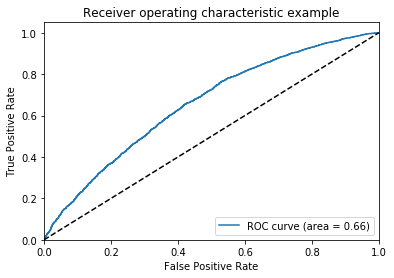

In [136]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#8. Aplicacion de modelos adicionales

##8.1 Algoritmo de Arbol de Clasficacion

In [137]:
# Arbol de clasificacion

from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(maxDepth=10,labelCol="FLAG_VENTA")
dt_model = dt.fit(training_df)

dt_prediction = dt_model.transform(test_df)

dt_prediction.select("prediction", "FLAG_VENTA", "features").show()

+----------+----------+--------------------+
|prediction|FLAG_VENTA|            features|
+----------+----------+--------------------+
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       1.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,4,5,6,9]...|
|       0.0|         0|(11,[0,1,5,6,9,10...|
|       0.0|         0|(11,[0,1,5,6,9,10...|
|       0.0|         0|(11,[0,1,5,9,10],...|
|       0.0|         0|(11,[1,2,5,7,8,9]...|
|       0.0|         0|(11,[1,2,5,7,8,9]...|
|       1.0|         0|(11,[1,2,5,7,8,9]...|
|       0.0|         0|(11,[1,2,5,7,8,9]...|
|       0.0|         0|(11,[1,2,5,7,8,9]...|
|       0.0|         0|(11,[1,2,5,7,8,9]...|
|       0.0|         0|(11,[1,2,5,7,8,9]...|
|       0.

In [141]:
# Reglas del arbol
print(dt_model.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_15d1566471a0) of depth 10 with 641 nodes
  If (feature 10 <= 0.5)
   If (feature 1 <= 15593.5)
    If (feature 0 <= 0.6393755)
     If (feature 5 <= 2500.1099999999997)
      If (feature 4 <= 610.5)
       If (feature 6 <= 14248.0)
        Predict: 0.0
       Else (feature 6 > 14248.0)
        If (feature 6 <= 16794.166665)
         If (feature 1 <= 4206.0)
          If (feature 1 <= 2599.0)
           Predict: 0.0
          Else (feature 1 > 2599.0)
           Predict: 1.0
         Else (feature 1 > 4206.0)
          Predict: 0.0
        Else (feature 6 > 16794.166665)
         Predict: 0.0
      Else (feature 4 > 610.5)
       If (feature 3 <= 1436.5)
        If (feature 7 <= 0.7174564999999999)
         If (feature 0 <= 0.32626350000000004)
          Predict: 0.0
         Else (feature 0 > 0.32626350000000004)
          If (feature 9 <= 178.5)
           Predict: 0.0
          Else (feature 9 > 178.5)
           Predict: 1.

In [138]:
# Evaluacion del poder predictivo del arbol
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="FLAG_VENTA", predictionCol="prediction", metricName="accuracy")

dt_accuracy = evaluator.evaluate(dt_prediction)
print("Accuracy of DecisionTreeClassifier is = %g"% (dt_accuracy))
print("Test Error of DecisionTreeClassifier = %g " % (1.0 - dt_accuracy))


Accuracy of DecisionTreeClassifier is = 0.954717
Test Error of DecisionTreeClassifier = 0.0452833 


In [139]:
# LLamando a las librerias de evaluacion de modelamiento

from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = dt_prediction.select(['probability', 'FLAG_VENTA'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The ROC score is (@numTrees=200): ", metrics.areaUnderROC)

The ROC score is (@numTrees=200):  0.6146786298013527


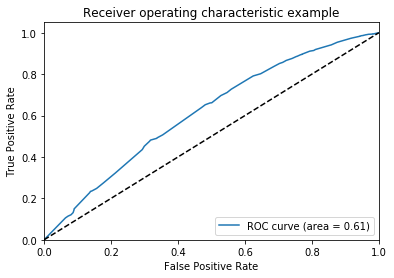

In [140]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##8.2 Algoritmo Random Forest

In [142]:
# Aplicacion de Algoritmo Random Fores para modelamiento de clasificacion

from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol="FLAG_VENTA", numTrees=150)
rf_model = rf.fit(training_df)

rf_prediction = rf_model.transform(test_df)

rf_prediction.select("prediction", "FLAG_VENTA", "features").show()

+----------+----------+--------------------+
|prediction|FLAG_VENTA|            features|
+----------+----------+--------------------+
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,3,5,6,9]...|
|       0.0|         0|(11,[0,1,4,5,6,9]...|
|       0.0|         0|(11,[0,1,5,6,9,10...|
|       0.0|         0|(11,[0,1,5,6,9,10...|
|       0.0|         0|(11,[0,1,5,9,10],...|
|       0.0|         0|(11,[1,2,5,7,8,9]...|
|       0.0|         0|(11,[1,2,5,7,8,9]...|
|       0.0|         0|(11,[1,2,5,7,8,9]...|
|       0.0|         0|(11,[1,2,5,7,8,9]...|
|       0.0|         0|(11,[1,2,5,7,8,9]...|
|       0.0|         0|(11,[1,2,5,7,8,9]...|
|       0.0|         0|(11,[1,2,5,7,8,9]...|
|       0.

In [143]:
# LLamando a las librerias de evaluacion de modelamiento

from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = rf_prediction.select(['probability', 'FLAG_VENTA'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The ROC score is (@numTrees=200): ", metrics.areaUnderROC)

The ROC score is (@numTrees=200):  0.6594659065832565


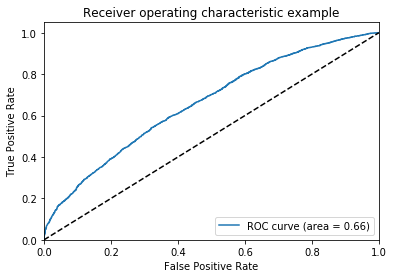

In [144]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [145]:
# Extra identificador de variables importantes
rf_model.featureImportances

SparseVector(11, {0: 0.1313, 1: 0.0752, 2: 0.1114, 3: 0.0592, 4: 0.0852, 5: 0.0569, 6: 0.0763, 7: 0.0462, 8: 0.0567, 9: 0.0709, 10: 0.2308})

In [146]:
# Diccionario de caracteristicas
training_df.schema["features"].metadata["ml_attr"]["attrs"]

{'numeric': [{'idx': 0, 'name': 'USO_TRIM_LINEA_BBVA'},
  {'idx': 1, 'name': 'LINEA_RENOVADO'},
  {'idx': 2, 'name': 'USO_LINEA_TOTAL_TC_T2'},
  {'idx': 3, 'name': 'Ahorro_Sldo_Bco_T1'},
  {'idx': 4, 'name': 'PConsumo_Sldo_Bco_T1'},
  {'idx': 5, 'name': 'SUELDO_ESTIMADO'},
  {'idx': 6, 'name': 'SDO_BCO_tot_sm_pasivo_Bco_6M'},
  {'idx': 7, 'name': 'CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD'},
  {'idx': 8, 'name': 'SDO_CONSUMO_T2'},
  {'idx': 9, 'name': 'ANTIGUEDAD_MES'},
  {'idx': 10, 'name': 'RESENCIA_OFERTA_PLD_RENOVADO'}]}

## 8.3  Algoritmo de Naive Bayes

In [147]:
# Aplicacion de Algoritmo Random Fores para modelamiento de clasificacion

from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes(labelCol="FLAG_VENTA")
nb_model = nb.fit(training_df)

nb_prediction = nb_model.transform(test_df)

nb_prediction.select("prediction", "FLAG_VENTA", "features").show()

Py4JJavaError: ignored

In [0]:
# LLamando a las librerias de evaluacion de modelamiento

from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = nb_prediction.select(['probability', 'FLAG_VENTA'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The ROC score is (@numTrees=200): ", metrics.areaUnderROC)

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##8.4  * Algoritmo de clasificacion Support Vector Machine

In [157]:

from pyspark.ml.classification import LinearSVC

svm = NaiveBayes(labelCol="FLAG_VENTA")
svm_model = svm.fit(training_df)

svm_prediction = svm_model.transform(test_df)

svm_prediction.select("prediction", "FLAG_VENTA", "features").show()

Py4JJavaError: ignored

In [0]:
# LLamando a las librerias de evaluacion de modelamiento

from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = svm_prediction.select(['probability', 'FLAG_VENTA'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The ROC score is (@numTrees=200): ", metrics.areaUnderROC)

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 8.5 * Modelo de Red neuronal multicapa

In [0]:
from pyspark.ml.classification import MultilayerPerceptronClassifier


# Especificando las capas para la Red Neuronal:
# Input de las capas es de tamanio 4 (features), dos capas intermedias de tmannio 5 and 4
# y el output de salida es de tamanio 2 (classes)

#Tener mucho cuidado al definir los valores ingresados en la red neuronal!!!!!
layers = [15, 5, 4, 2]


mlp = MultilayerPerceptronClassifier(maxIter=100, layers=layers, blockSize=128, seed=1234, labelCol="FLAG_VENTA")
mlp_model = mlp.fit(training_df)

mlp_prediction = mlp_model.transform(test_df)


In [0]:
mlp_prediction.describe()

In [0]:
# LLamando a las librerias de evaluacion de modelamiento

from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = mlp_prediction.select(['probability', 'FLAG_VENTA'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The ROC score is (@numTrees=200): ", metrics.areaUnderROC)

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()